In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

In [7]:
test = pd.read_csv("./data/test.csv", encoding="latin-1")
train = pd.read_csv("./data/train.csv", encoding="latin-1")
sub = pd.read_csv("./data/sample_submission.csv")

test.shape, train.shape, sub.shape

((75818, 370), (76020, 371), (75818, 2))

In [8]:
test.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=370)

In [9]:
train.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [10]:
train["TARGET"].unique()

array([0, 1], dtype=int64)

In [11]:
train["TARGET"].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


<AxesSubplot:xlabel='TARGET', ylabel='count'>

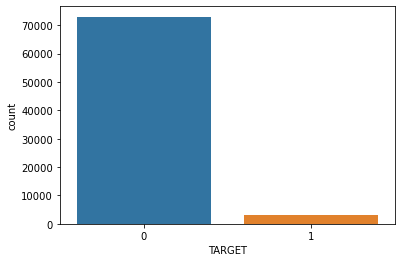

In [13]:
sns.countplot(x="TARGET", data=train)

In [14]:
unsatisfied = train["TARGET"].value_counts()[1]
unsatisfied / train["TARGET"].count()

0.0395685345961589

In [15]:
train.isnull().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [16]:
train.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [17]:
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [18]:
train["var3"].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 218           1
 215           1
 151           1
 87            1
 191           1
Name: var3, Length: 208, dtype: int64

In [19]:
### 가장 많이 나온 값으로 대체
train["var3"].replace(-999999, 2, inplace=True)

In [20]:
train = train.loc[:, "var3":]
train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [21]:
summary = train.describe()
type(summary)

print(summary.loc["min", :].min() , summary.loc["min", :].max())
print(summary.loc["max", :].min() , summary.loc["max", :].max())
print(summary.loc["count", :].min() , summary.loc["count", :].max())
print(summary.loc["mean", :].min() , summary.loc["mean", :].max())

-4942.26 5163.75
0.0 9999999999.0
76020.0 76020.0
0.0 48671402.235872336


In [22]:
from sklearn.model_selection import train_test_split

In [24]:
## 데이터 나누기

X = train.iloc[:, :-1]
y = train["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=0)

In [26]:
## 레이블 분포비율
print( "학습용 레이블 분포 비율 : \n" , y_train.value_counts() / y_train.count() )
print( "테스트용 레이블 분포 비율 : \n" , y_test.value_counts() / y_test.count() )


학습용 레이블 분포 비율 : 
 0    0.960964
1    0.039036
Name: TARGET, dtype: float64
테스트용 레이블 분포 비율 : 
 0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [27]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [28]:
from sklearn.metrics import roc_auc_score

In [29]:
xgb_model = XGBClassifier(n_estimators=500, random_state=77)
xgb_model

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=77, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [32]:
xgb_model.fit(X_train, y_train, early_stopping_rounds=100,
             eval_metric="auc",
             eval_set=[(X_train, y_train), (X_test, y_test)])

C:\Users\jypark\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85831	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88072	validation_1-auc:0.84117
[16]	validation_0-auc:0.88238	validation_1-auc:0.84101
[17]	validation_0-auc:0.88354	validation_1-auc:0.84071
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=77,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
pred_prob = xgb_model.predict_proba(X_test)[:, 1]
pred_prob[0:10]

array([0.00643863, 0.02387667, 0.01260844, 0.01592306, 0.01641693,
       0.00643863, 0.00618323, 0.01146051, 0.02199604, 0.0668072 ],
      dtype=float32)

In [36]:
xgb_roc_score = roc_auc_score(y_test, pred_prob, average="macro")
print("ROC AUC : {0: .4f}".format(xgb_roc_score))

ROC AUC :  0.8413


### 하이퍼 파라미터 튜닝

* "max_depth" , "min_child_weight" , "colsample_bytree"

In [48]:
from sklearn.model_selection import GridSearchCV

xgb_model1 = XGBClassifier(n_estimators=100, random_state=77, n_job=-1)

params = {
    "max_depth": [3,5],
    "min_child_weight": [1],
    "colsample_bytree": [0.3],
    "learning_rate": [ 0.3, 0.4, 0.5 ]
}

gridcv = GridSearchCV(xgb_model1, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, 
          eval_metric="auc",
          eval_set = [(X_train, y_train), (X_test, y_test)])

C:\Users\jypark\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_job" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.68074	validation_1-auc:0.68542
[1]	validation_0-auc:0.72359	validation_1-auc:0.72671
[2]	validation_0-auc:0.73057	validation_1-auc:0.73382
[3]	validation_0-auc:0.79058	validation_1-auc:0.79556
[4]	validation_0-auc:0.79054	validation_1-auc:0.79654
[5]	validation_0-auc:0.79623	validation_1-auc:0.80009
[6]	validation_0-auc:0.79317	validation_1-auc:0.79968
[7]	validation_0-auc:0.78698	validation_1-auc:0.79361
[8]	validation_0-auc:0.80531	validation_1-auc:0.81553
[9]	validation_0-auc:0.80593	validation_1-auc:0.81216
[10]	validation_0-auc:0.80764	validation_1-auc

C:\Users\jypark\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_job" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.68945	validation_1-auc:0.69713
[1]	validation_0-auc:0.71932	validation_1-auc:0.72821
[2]	validation_0-auc:0.72724	validation_1-auc:0.73467
[3]	validation_0-auc:0.79636	validation_1-auc:0.80385
[4]	validation_0-auc:0.79123	validation_1-auc:0.80141
[5]	validation_0-auc:0.79081	validation_1-auc:0.80031
[6]	validation_0-auc:0.79013	validation_1-auc:0.79738
[7]	validation_0-auc:0.78751	validation_1-auc:0.79436
[8]	validation_0-auc:0.80754	validation_1-auc:0.81785
[9]	validation_0-auc:0.80494	validation_1-auc:0.81284
[10]	validation_0-auc:0.80626	validation_1-auc

C:\Users\jypark\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_job" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.69324	validation_1-auc:0.69889
[1]	validation_0-auc:0.73091	validation_1-auc:0.73858
[2]	validation_0-auc:0.73871	validation_1-auc:0.74645
[3]	validation_0-auc:0.79806	validation_1-auc:0.80551
[4]	validation_0-auc:0.79519	validation_1-auc:0.80269
[5]	validation_0-auc:0.79721	validation_1-auc:0.80372
[6]	validation_0-auc:0.79388	validation_1-auc:0.80056
[7]	validation_0-auc:0.79266	validation_1-auc:0.79894
[8]	validation_0-auc:0.81078	validation_1-auc:0.81946
[9]	validation_0-auc:0.80907	validation_1-auc:0.81688
[10]	validation_0-auc:0.81027	validation_1-auc

C:\Users\jypark\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_job" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.70057	validation_1-auc:0.70607
[1]	validation_0-auc:0.73924	validation_1-auc:0.74352
[2]	validation_0-auc:0.75183	validation_1-auc:0.75116
[3]	validation_0-auc:0.81298	validation_1-auc:0.81649
[4]	validation_0-auc:0.80676	validation_1-auc:0.81190
[5]	validation_0-auc:0.80873	validation_1-auc:0.81119
[6]	validation_0-auc:0.80810	validation_1-auc:0.80974
[7]	validation_0-auc:0.80636	validation_1-auc:0.80682
[8]	validation_0-auc:0.82449	validation_1-auc:0.82319
[9]	validation_0-auc:0.82438	validation_1-auc:0.82080
[10]	validation_0-auc:0.82572	validation_1-auc

C:\Users\jypark\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_job" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.69711	validation_1-auc:0.70272
[1]	validation_0-auc:0.73371	validation_1-auc:0.73929
[2]	validation_0-auc:0.75953	validation_1-auc:0.76264
[3]	validation_0-auc:0.81817	validation_1-auc:0.82000
[4]	validation_0-auc:0.81363	validation_1-auc:0.81832
[5]	validation_0-auc:0.81224	validation_1-auc:0.81588
[6]	validation_0-auc:0.81245	validation_1-auc:0.81419
[7]	validation_0-auc:0.81064	validation_1-auc:0.81164
[8]	validation_0-auc:0.82587	validation_1-auc:0.82646
[9]	validation_0-auc:0.82573	validation_1-auc:0.82274
[10]	validation_0-auc:0.82725	validation_1-auc

C:\Users\jypark\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_job" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.70005	validation_1-auc:0.70455
[1]	validation_0-auc:0.74167	validation_1-auc:0.74287
[2]	validation_0-auc:0.76291	validation_1-auc:0.76216
[3]	validation_0-auc:0.82074	validation_1-auc:0.81717
[4]	validation_0-auc:0.81653	validation_1-auc:0.81246
[5]	validation_0-auc:0.81539	validation_1-auc:0.80931
[6]	validation_0-auc:0.81451	validation_1-auc:0.80905
[7]	validation_0-auc:0.81114	validation_1-auc:0.80667
[8]	validation_0-auc:0.82713	validation_1-auc:0.82308
[9]	validation_0-auc:0.82718	validation_1-auc:0.81908
[10]	validation_0-auc:0.82719	validation_1-auc

C:\Users\jypark\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_job" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.68074	validation_1-auc:0.68542
[1]	validation_0-auc:0.72269	validation_1-auc:0.72629
[2]	validation_0-auc:0.73048	validation_1-auc:0.73429
[3]	validation_0-auc:0.79397	validation_1-auc:0.79967
[4]	validation_0-auc:0.79259	validation_1-auc:0.79887
[5]	validation_0-auc:0.79609	validation_1-auc:0.80105
[6]	validation_0-auc:0.79781	validation_1-auc:0.80368
[7]	validation_0-auc:0.79872	validation_1-auc:0.80516
[8]	validation_0-auc:0.81349	validation_1-auc:0.82123
[9]	validation_0-auc:0.81309	validation_1-auc:0.81758
[10]	validation_0-auc:0.81594	validation_1-auc

C:\Users\jypark\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_job" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.68945	validation_1-auc:0.69713
[1]	validation_0-auc:0.71932	validation_1-auc:0.72821
[2]	validation_0-auc:0.73775	validation_1-auc:0.74469
[3]	validation_0-auc:0.80051	validation_1-auc:0.80699
[4]	validation_0-auc:0.79424	validation_1-auc:0.80410
[5]	validation_0-auc:0.79664	validation_1-auc:0.80616
[6]	validation_0-auc:0.79362	validation_1-auc:0.80159
[7]	validation_0-auc:0.79084	validation_1-auc:0.79781
[8]	validation_0-auc:0.81470	validation_1-auc:0.82222
[9]	validation_0-auc:0.81712	validation_1-auc:0.82238
[10]	validation_0-auc:0.81966	validation_1-auc

C:\Users\jypark\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_job" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.69324	validation_1-auc:0.69889
[1]	validation_0-auc:0.73103	validation_1-auc:0.73869
[2]	validation_0-auc:0.74527	validation_1-auc:0.75392
[3]	validation_0-auc:0.80473	validation_1-auc:0.81254
[4]	validation_0-auc:0.79873	validation_1-auc:0.80714
[5]	validation_0-auc:0.79770	validation_1-auc:0.80546
[6]	validation_0-auc:0.79933	validation_1-auc:0.80753
[7]	validation_0-auc:0.79805	validation_1-auc:0.80585
[8]	validation_0-auc:0.81510	validation_1-auc:0.82376
[9]	validation_0-auc:0.81551	validation_1-auc:0.82123
[10]	validation_0-auc:0.81733	validation_1-auc

C:\Users\jypark\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_job" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.70057	validation_1-auc:0.70607
[1]	validation_0-auc:0.73947	validation_1-auc:0.74485
[2]	validation_0-auc:0.75374	validation_1-auc:0.75319
[3]	validation_0-auc:0.81742	validation_1-auc:0.82015
[4]	validation_0-auc:0.81048	validation_1-auc:0.81533
[5]	validation_0-auc:0.81080	validation_1-auc:0.81268
[6]	validation_0-auc:0.81138	validation_1-auc:0.81496
[7]	validation_0-auc:0.80916	validation_1-auc:0.81304
[8]	validation_0-auc:0.83087	validation_1-auc:0.82758
[9]	validation_0-auc:0.83180	validation_1-auc:0.82537
[10]	validation_0-auc:0.83390	validation_1-auc

C:\Users\jypark\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_job" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.69711	validation_1-auc:0.70272
[1]	validation_0-auc:0.73409	validation_1-auc:0.73956
[2]	validation_0-auc:0.76344	validation_1-auc:0.76670
[3]	validation_0-auc:0.82104	validation_1-auc:0.82156
[4]	validation_0-auc:0.81518	validation_1-auc:0.81817
[5]	validation_0-auc:0.81327	validation_1-auc:0.81463
[6]	validation_0-auc:0.81339	validation_1-auc:0.81199
[7]	validation_0-auc:0.81237	validation_1-auc:0.80875
[8]	validation_0-auc:0.83404	validation_1-auc:0.82605
[9]	validation_0-auc:0.83336	validation_1-auc:0.82499
[10]	validation_0-auc:0.83383	validation_1-auc

C:\Users\jypark\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_job" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.70005	validation_1-auc:0.70455
[1]	validation_0-auc:0.74170	validation_1-auc:0.74401
[2]	validation_0-auc:0.76491	validation_1-auc:0.76421
[3]	validation_0-auc:0.82283	validation_1-auc:0.81950
[4]	validation_0-auc:0.81928	validation_1-auc:0.81261
[5]	validation_0-auc:0.81781	validation_1-auc:0.81013
[6]	validation_0-auc:0.81828	validation_1-auc:0.81009
[7]	validation_0-auc:0.81729	validation_1-auc:0.80875
[8]	validation_0-auc:0.83257	validation_1-auc:0.82699
[9]	validation_0-auc:0.83406	validation_1-auc:0.82533
[10]	validation_0-auc:0.83639	validation_1-auc

C:\Users\jypark\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_job" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.68074	validation_1-auc:0.68542
[1]	validation_0-auc:0.72269	validation_1-auc:0.72629
[2]	validation_0-auc:0.73288	validation_1-auc:0.73660
[3]	validation_0-auc:0.79974	validation_1-auc:0.80511
[4]	validation_0-auc:0.79536	validation_1-auc:0.79921
[5]	validation_0-auc:0.79746	validation_1-auc:0.80195
[6]	validation_0-auc:0.79865	validation_1-auc:0.80310
[7]	validation_0-auc:0.79951	validation_1-auc:0.80457
[8]	validation_0-auc:0.81913	validation_1-auc:0.82458
[9]	validation_0-auc:0.82115	validation_1-auc:0.82333
[10]	validation_0-auc:0.82293	validation_1-auc

C:\Users\jypark\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_job" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.68945	validation_1-auc:0.69713
[1]	validation_0-auc:0.71950	validation_1-auc:0.72844
[2]	validation_0-auc:0.73778	validation_1-auc:0.74511
[3]	validation_0-auc:0.80128	validation_1-auc:0.80822
[4]	validation_0-auc:0.79614	validation_1-auc:0.79963
[5]	validation_0-auc:0.79500	validation_1-auc:0.79966
[6]	validation_0-auc:0.80203	validation_1-auc:0.80529
[7]	validation_0-auc:0.80084	validation_1-auc:0.80391
[8]	validation_0-auc:0.82015	validation_1-auc:0.82574
[9]	validation_0-auc:0.82335	validation_1-auc:0.82785
[10]	validation_0-auc:0.82539	validation_1-auc

C:\Users\jypark\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_job" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.69324	validation_1-auc:0.69889
[1]	validation_0-auc:0.73103	validation_1-auc:0.73869
[2]	validation_0-auc:0.74383	validation_1-auc:0.75631
[3]	validation_0-auc:0.80704	validation_1-auc:0.81356
[4]	validation_0-auc:0.79971	validation_1-auc:0.80538
[5]	validation_0-auc:0.79639	validation_1-auc:0.80040
[6]	validation_0-auc:0.80149	validation_1-auc:0.80605
[7]	validation_0-auc:0.80287	validation_1-auc:0.80617
[8]	validation_0-auc:0.82011	validation_1-auc:0.82209
[9]	validation_0-auc:0.82256	validation_1-auc:0.82274
[10]	validation_0-auc:0.82516	validation_1-auc

C:\Users\jypark\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_job" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.70057	validation_1-auc:0.70607
[1]	validation_0-auc:0.74160	validation_1-auc:0.74545
[2]	validation_0-auc:0.76305	validation_1-auc:0.76133
[3]	validation_0-auc:0.82461	validation_1-auc:0.81941
[4]	validation_0-auc:0.81966	validation_1-auc:0.81570
[5]	validation_0-auc:0.81993	validation_1-auc:0.81409
[6]	validation_0-auc:0.82095	validation_1-auc:0.81520
[7]	validation_0-auc:0.82151	validation_1-auc:0.81040
[8]	validation_0-auc:0.84018	validation_1-auc:0.82396
[9]	validation_0-auc:0.84212	validation_1-auc:0.82425
[10]	validation_0-auc:0.84499	validation_1-auc

C:\Users\jypark\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_job" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.69711	validation_1-auc:0.70272
[1]	validation_0-auc:0.73538	validation_1-auc:0.74110
[2]	validation_0-auc:0.76957	validation_1-auc:0.77162
[3]	validation_0-auc:0.82839	validation_1-auc:0.82573
[4]	validation_0-auc:0.82323	validation_1-auc:0.81968
[5]	validation_0-auc:0.82035	validation_1-auc:0.81687
[6]	validation_0-auc:0.82313	validation_1-auc:0.81426
[7]	validation_0-auc:0.82077	validation_1-auc:0.81447
[8]	validation_0-auc:0.83873	validation_1-auc:0.82948
[9]	validation_0-auc:0.84100	validation_1-auc:0.82953
[10]	validation_0-auc:0.84317	validation_1-auc

C:\Users\jypark\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_job" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.70005	validation_1-auc:0.70455
[1]	validation_0-auc:0.74161	validation_1-auc:0.74388
[2]	validation_0-auc:0.76522	validation_1-auc:0.76330
[3]	validation_0-auc:0.82671	validation_1-auc:0.82182
[4]	validation_0-auc:0.82238	validation_1-auc:0.81418
[5]	validation_0-auc:0.81844	validation_1-auc:0.81043
[6]	validation_0-auc:0.82082	validation_1-auc:0.81395
[7]	validation_0-auc:0.82095	validation_1-auc:0.81171
[8]	validation_0-auc:0.83724	validation_1-auc:0.82753
[9]	validation_0-auc:0.83966	validation_1-auc:0.82525
[10]	validation_0-auc:0.84332	validation_1-auc

C:\Users\jypark\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_job" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.69398	validation_1-auc:0.69890
[1]	validation_0-auc:0.72987	validation_1-auc:0.73413
[2]	validation_0-auc:0.73965	validation_1-auc:0.74425
[3]	validation_0-auc:0.79568	validation_1-auc:0.80194
[4]	validation_0-auc:0.79447	validation_1-auc:0.80267
[5]	validation_0-auc:0.79825	validation_1-auc:0.80514
[6]	validation_0-auc:0.79383	validation_1-auc:0.80000
[7]	validation_0-auc:0.79066	validation_1-auc:0.79624
[8]	validation_0-auc:0.81061	validation_1-auc:0.82010
[9]	validation_0-auc:0.81010	validation_1-auc:0.81715
[10]	validation_0-auc:0.81191	validation_1-auc

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_job=-1, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=77, reg_alpha=None,
                                     reg_lambda=None, scale_po

In [42]:
# "max_depth" , "min_child_weight" , "colsample_bytree"
print("GridSarchCV 최적 파라미터 : ", gridcv.best_params_)

GridSarchCV 최적 파라미터 :  {'colsample_bytree': 0.3, 'max_depth': 3, 'min_child_weight': 1}


In [49]:
# "max_depth" , "min_child_weight" , "colsample_bytree", "learning_rate"
print("GridSarchCV 최적 파라미터 : ", gridcv.best_params_)

GridSarchCV 최적 파라미터 :  {'colsample_bytree': 0.3, 'learning_rate': 0.3, 'max_depth': 3, 'min_child_weight': 1}


In [50]:
pred_prob = xgb_model.predict_proba(X_test)[:, 1]
xgb_roc_score = roc_auc_score(y_test, pred_prob, average="macro")
print("ROC AUC : {0: .4f}".format(xgb_roc_score))

ROC AUC :  0.8413
